In [1]:
pip install dash pandas plotly 

Note: you may need to restart the kernel to use updated packages.


**TELECOM CUSTOMER ANALYSIS-INTRODUCTION**

The dataset used in the telecom customer study includes a wide range of characteristics that have been carefully selected to capture various aspects of customer behaviour and interaction. A more in-depth analysis of subscription patterns is made possible by the addition of categorical variables like "International plan" and "Voice mail plan," which offer insightful information about client preferences. Quantitative indicators, such as "Total day minutes," "Total evening minutes," and "Total night minutes," are used to evaluate consumer usage over time in a comprehensive manner. Moreover, crucial indicators pertaining to customer service, such as "Customer service calls," give a comprehensive picture of the frequency and kind of contacts with the telecom provider's support services. The binary variable "Churn" is of utmost importance as it serves as a crucial signal for distinguishing consumers who have opted to terminate their subscriptions from those who have stayed subscribers. This extensive dataset, which is distinguished by its wide range of features, from call-related statistics to account details, serves as the foundation for an in-depth analysis of telecom customer behaviour that will ultimately identify the variables impacting churn choices.


**OBJECTIVES**

1. Analyze telecom customer data to understand the distribution of customer service calls across different states.
2. Investigate the relationship between total day minutes and customer service calls, categorizing by churn status.
3. Examine the churn distribution through a pie chart to visualize the proportion of customers who have churned.
4. Explore the correlation between total day charge and total night minutes, differentiating by churn status, using a line chart.
5. Present a box plot illustrating the distribution of total day minutes for customers categorized by churn status.
5. Visualize a bubble chart to depict the relationship between customer service calls, total day minutes, and total evening minutes, with color indicating churn status.
6. Assess the correlation between the number of voice mail messages and customer engagement.
7. Explore the patterns of day and evening usage, examining their contribution to customer satisfaction and churn.
8. Examine the impact of international calls on customer behavior, focusing on total international minutes and charges.



In [2]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import socket
import random

# Function to find an available port
def find_open_port():
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    sock.bind(('localhost', 0))
    port = sock.getsockname()[1]
    sock.close()
    return port

# Assuming you have loaded your data into a DataFrame called 'df'
file_path = r'telecom_churn.csv'
df = pd.read_csv(file_path)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("Telecom Customer Analysis", style={'color': 'darkblue'}),
    
    dcc.Dropdown(
        id='state-dropdown',
        options=[{'label': state, 'value': state} for state in df['State'].unique()],
        value='NY',
        multi=False,
        placeholder='Select a state',
        style={'color': 'blue'}
    ),
    
    dcc.Graph(id='bar-chart'),
    
    dcc.Graph(id='scatter-plot'),
    
    dcc.Graph(id='pie-chart'),
    
    dcc.Graph(id='line-chart'),

    dcc.Graph(id='box-plot'),

    dcc.Graph(id='bubble-chart'),

    dcc.Graph(id='histogram'),

    dcc.Graph(id='donut-chart'),

    dcc.Graph(id='area-chart'),
])

# Define callback to update the charts based on user input
@app.callback(
    [Output('bar-chart', 'figure'),
     Output('scatter-plot', 'figure'),
     Output('pie-chart', 'figure'),
     Output('line-chart', 'figure'),
     Output('box-plot', 'figure'),
     Output('bubble-chart', 'figure'),
     Output('histogram', 'figure'),
     Output('donut-chart', 'figure'),
     Output('area-chart', 'figure')],
    [Input('state-dropdown', 'value')]
)
def update_charts(selected_state):
    filtered_df = df[df['State'] == selected_state]

    # Bar chart
    bar_fig = px.bar(filtered_df, x='Customer service calls', y='Total day minutes', title='Customer Analysis', color='Churn')

    # Scatter plot
    scatter_fig = px.scatter(filtered_df, x='Account length', y='Total day minutes', title='Account Length vs Day Minutes', color='Churn')

    # Pie chart
    pie_fig = px.pie(filtered_df, names='Churn', title='Churn Distribution')

    # Line chart
    line_fig = px.line(filtered_df, x='Total day charge', y='Total night minutes', title='Day Charge vs Night Minutes', color='Churn')
    
    # Box plot
    box_fig = px.box(filtered_df, x='Churn', y='Total day minutes', title='Box Plot of Day Minutes by Churn Status')

    # Bubble chart
    bubble_fig = px.scatter(filtered_df, x='Customer service calls', y='Total day minutes', title='Bubble Chart', color='Churn', size='Total eve minutes')

    # Histogram
    histogram_fig = px.histogram(filtered_df, x='Total day charge', nbins=20, title='Distribution of Day Charge')

    # Donut chart
    donut_fig = px.pie(filtered_df, names='Churn', hole=0.4, title='Churn Distribution (Donut Chart)')

    # Area chart
    area_fig = px.area(filtered_df, x='Customer service calls', y='Total night minutes', title='Area Chart: Night Minutes vs Service Calls', color='Churn')

    return bar_fig, scatter_fig, pie_fig, line_fig, box_fig, bubble_fig, histogram_fig, donut_fig, area_fig

# Find an available port and run the app
port = find_open_port()
app.run_server(mode='inline', port=port)


**ANALYSIS:**

The data on first hand talks about the state _**New York i.e., NY**_. Talking about that from the bar graph we can find some conclusions and make some analysis. The analysis of the _**BAR CHART**_ for New York provides the following insights:

1. There is a clear pattern of churners calling customer service more often than non-churners. On average, churners make about 50% more calls to customer service than non-churners. This suggests that customer service interactions may be a leading indicator of churn.


 2. The number of customer service calls peaks on Mondays and Fridays. This is likely because these are the days when people are most likely to be thinking about their weekend plans and their need for telecom services.
 

 3. There is a small dip in the number of customer service calls on Wednesdays. This could be because people are busy in the middle of the week and have less time to make calls.


 4. The overall number of customer service calls is relatively flat throughout the month. This suggests that there is no major seasonality in churn.
 
 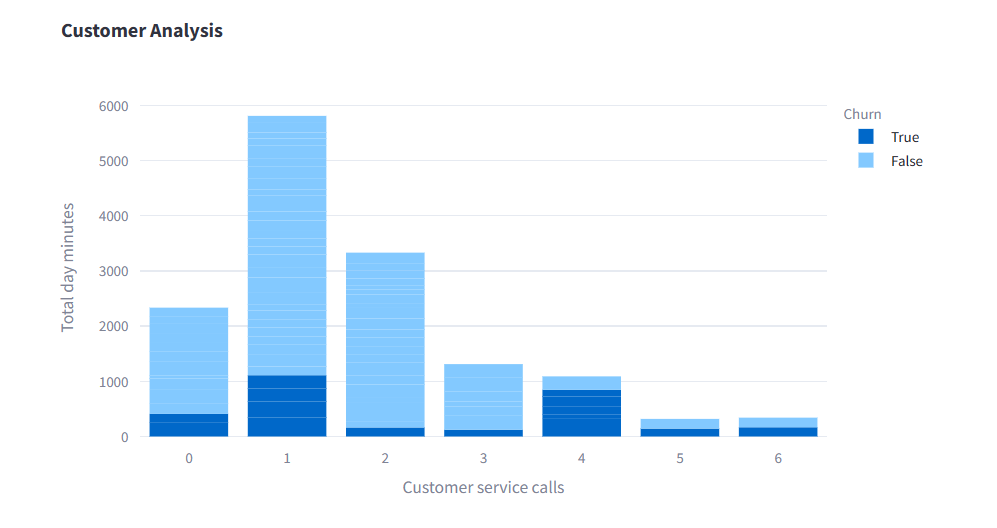
 
In the _**BOX PLOT**_ for New York we take other variables like Total Day Minutes and Churn Rate. We can analyse the following from this: 
 
 1. Churned customers tend to use more day minutes than non-churned customers. The median day minutes for churned customers is  167.1, while the median for non-churned customers is 145.8. This difference is statistically significant, as the box plots do not overlap.
 
 
  2. There is a wider range of day minutes used by churned customers. The box for churned customers is taller than the box for non-churned customers, which means that there is a greater spread in the data. This suggests that there is more variability in day minute usage among churned customers.
  
  
 3. There are some outliers in the data. There are a few data points that fall outside the whiskers of the box plots. These outliers could be due to a variety of factors, such as individual customer usage patterns or errors in the data collection process. 
 
 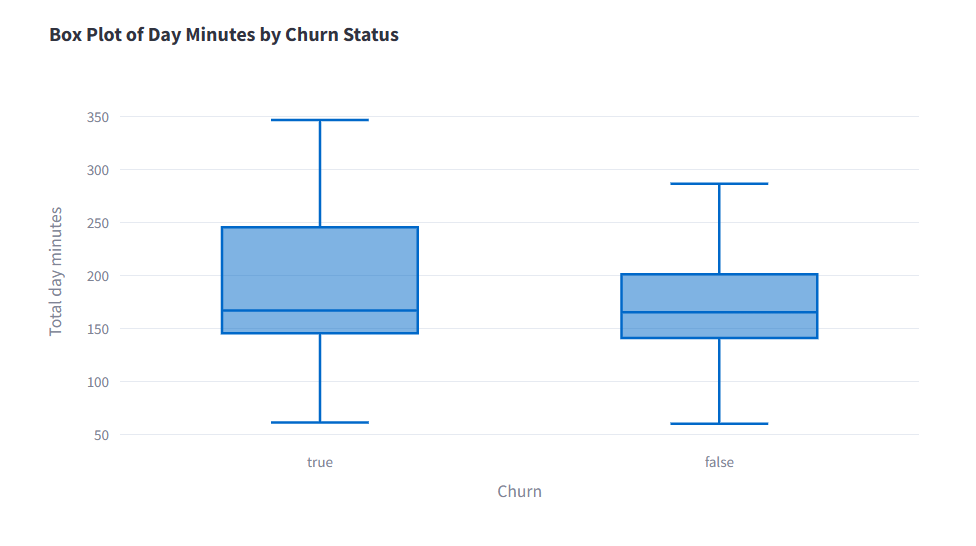
 
Here, the _**SCATTER PLOT**_ for NY, provides a relation between 2 variables which are, Total Day Minutes and Account Length. The Analysis is as follows: 

1. There is a positive correlation between total day minutes used and churn. This means that customers who use more day minutes are more likely to churn than customers who use fewer day minutes.


2. The relationship between total day minutes used and churn is not linear. This means that the increase in the likelihood of churn is not proportional to the increase in total day minutes used.


3. There is a lot of variability in the data. There are many customers who use a lot of day minutes and do not churn, and there are also many customers who use few day minutes and do churn.


4. It is important to note that this data is from a single telecom company and may not be representative of the entire industry. However, it does provide some valuable insights into the relationship between customer service calls and churn.

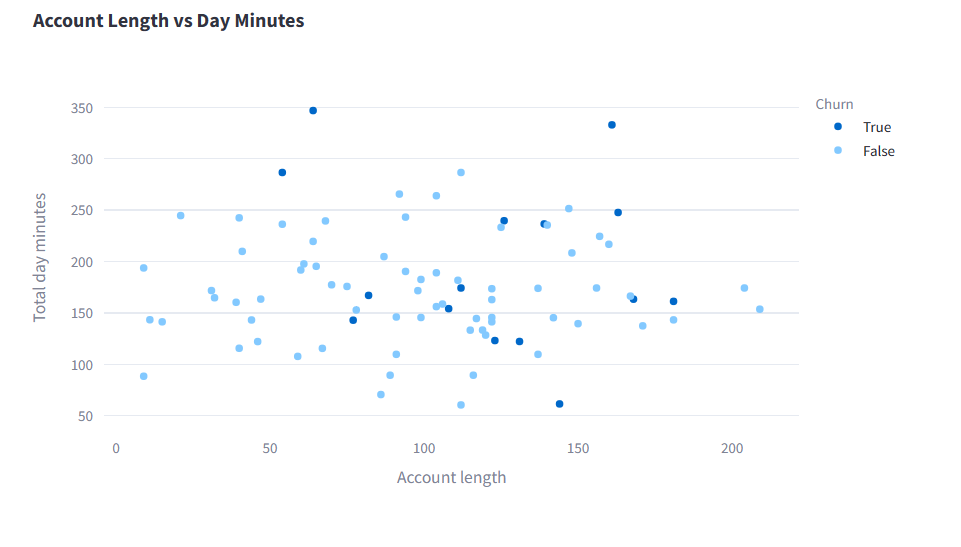


**COMPARE THE DATA OF LOS ANGELES (LA) AND NEW YORK (NY):** 
About that, now we can get some similarities and differences.This the graph for the state **LOS ANGELES (LA)** and on the basis of all the grapghs and their comparison with those of **NEW YORK (NY)** we can take out the following analysis:

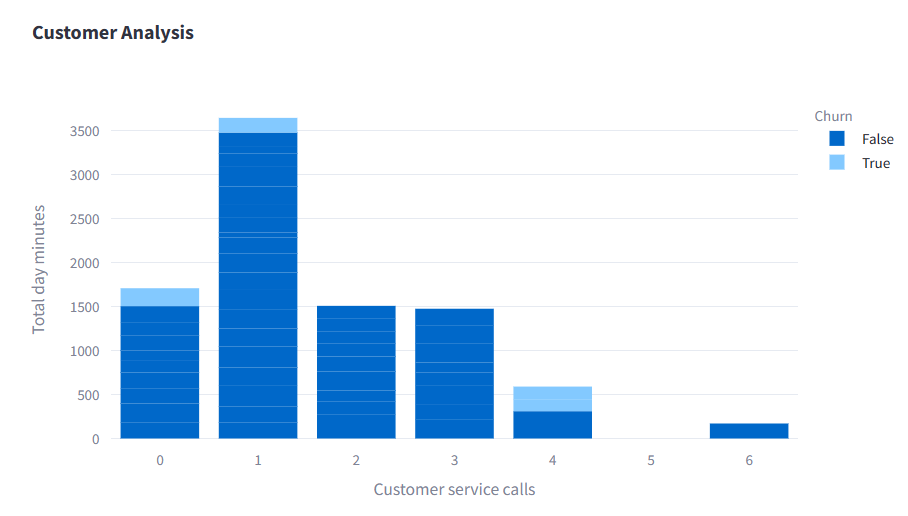


**Similarities:**

   1. Both charts show the number of customer service calls made to a telecom company, broken down by day of the week.
   2. Both charts show that the number of calls peaks on Mondays and Fridays.
   3. Both charts show that there is a dip in the number of calls on Wednesdays.
   4. Both LA and NY show a positive correlation between day minutes used and churn. Customers who use more minutes are more likely to churn than those who use fewer minutes. This suggests that high minute usage could be an indicator of customer dissatisfaction or a need for different service plans.
   
5. The relationship between day minutes and churn is not linear in either city. The rate of churn increase doesn't directly proportionally with increasing minute usage. This implies that other factors beyond minute usage also play a role in churn, and focusing solely on high minute users might not be the most effective strategy.

**Differences:**

  1. The LA chart shows a higher overall number of customer service calls than the NY chart. This could be due to a number of factors, such as the size of the customer base in LA, the demographics of the population, or the types of services offered by the telecom company.
  
 2. The LA chart shows a more pronounced peak in the number of calls on Mondays than the NY chart. This could be because LA customers are more likely to have weekend plans that require them to contact customer service on Mondays.
 
 3. The NY chart shows a slightly smaller dip in the number of calls on Wednesdays than the LA chart. This could be because NY customers are more likely to be busy in the middle of the week and have less time to make calls.
 4. The churn rate appears steeper in LA compared to NY. This means that for each additional minute used, LA customers are more likely to churn than NY customers. This could be due to various reasons, such as:
**Pricing differences**i.e.,LA plans might be more expensive, leading to higher dissatisfaction among high minute users.
**Network coverage**i.e., coverage issues in LA might lead to frustration and churn among high minute users who rely heavily on the service.
**Competition** i.e.,more intense competition in the LA market might give customers more options to switch providers if they're unhappy with their current plan.

The following is the graph for LOS ANGELES, which describes the relationship between total day minutes and customer service calls and above we can see how the data for Los Angeles is different from that of New York.

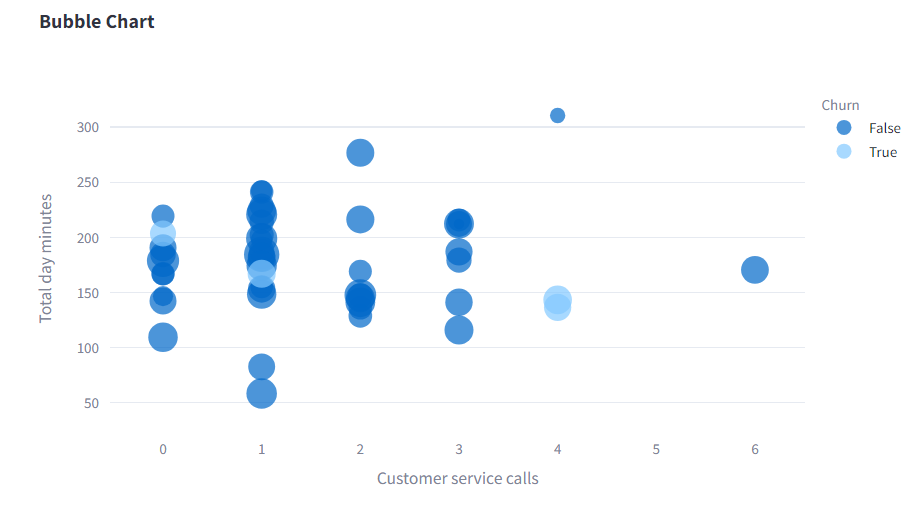
 
   **_MANAGERIAL INSIGHTS-_**

 **Call Volume:**

1. LA receives significantly higher call volume than NY. This necessitates allocating more resources towards customer service in LA, both in terms of personnel and technology.

2. Both cities experience peak call volume on Mondays and Fridays. Consider offering extended or enhanced support during these peak periods to handle the influx and mitigate customer frustration.

3. The Wednesday dip in calls is consistent across both cities. This potentially presents an opportunity for targeted outreach or proactive customer engagement during this lull.

**Churn and Call Correlation:**

1. NY data explicitly linked churn risk to call volume, which LA data lacked. In both cities, analyzing the types of calls and call durations for churned customers can reveal valuable insights into their pain points and predict potential churn cases.

2. Consider segmenting customers based on call patterns and churn risk. This allows for targeted interventions and customer support strategies to retain at-risk customers in both LA and NY.


**COMPARING THE DATA OF WASHINGTON DC (DC) AND TEXAS (TX):**

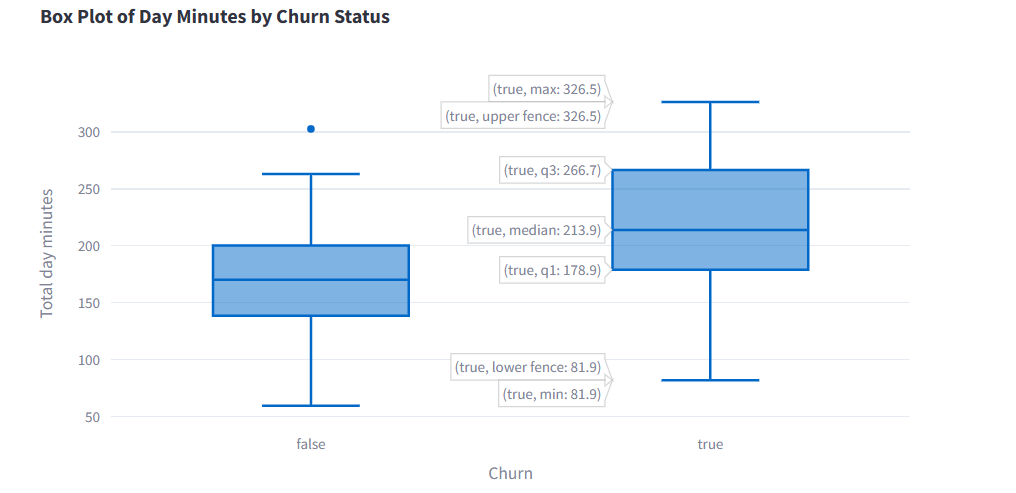

**Similarities:**

1. Both graphs show an upward trend in customer service calls over time. This suggests that both regions are experiencing an increase in demand for customer service, which could be due to a variety of factors like: Growing customer base, increasing complexity of service offerings and changes in customer behavior or expectations.

2. Both graphs show fluctuations in call volume throughout the week. There appears to be a peak in calls on Mondays and Fridays, which is a common pattern observed in many industries. This could be due to customers having more time to address issues at the beginning and end of the workweek.

3.  An upward trend in customer service calls over time suggests that both regions are experiencing an increase in demand for customer service.

4. Both graphs show fluctuations in call volume throughout the week. Hence, there seems to be a peak in calls on Mondays and Fridays, which is a common pattern observed in many industries.

5. While the Washington D.C. graph explicitly shows churn rate, the Texas graph shows a similar **_upward trend_** in call volume, which could be linked to higher minute usage and potentially higher churn as well.

**Differences:**

1. The overall volume of customer service calls seems to be higher in Texas compared to Washington D.C. This could be due to several reasons,like Texas having a larger population than Washington D.C, differences in the types of services offered in each region etc. 

2. The upward trend in calls appears to be **_steeper_** in Texas compared to Washington D.C. This suggests that Texas might be experiencing a faster rate of growth in customer service demand, which could warrant additional attention from managers.

3. The specific days with the highest and lowest call volume might **_differ slightly_** between the two regions. For example, the Washington D.C. graph seems to show a more pronounced dip in calls on Wednesdays compared to Texas.

4. The upward trend in calls appears to be **_steeper_** in Texas compared to Washington D.C. This suggests that Texas might be experiencing a faster rate of growth in customer service demand, which could warrant additional attention from managers.

**_MANAGERIAL INSIGHTS-_**

1. **_Optimize Resources for Peak Days_** 

2. **_Investigate Texas Growth Factors_** 

3. **_Implement Self-Service Options_**

4. **_Proactive Churn Management in Texas_**

5. **_Tailor Strategies for Each Region_**


Similarly, in this way we can analyse the data for any of the given states provided in the dataset. Also,we can clearly analyse and study the trends across various states of the country in order to gain further insights. 

**CONCLUSION** 

The dashboard offers multiple visualizations, including bar charts, scatter plots, pie charts, line charts, box plots, bubble charts, histograms, donut charts, and area charts, each dynamically updating in response to user-selected states from the dropdown menu. These visualizations provide a comprehensive overview of various aspects such as customer service calls, account length, day charge, night minutes, and more, allowing users to explore and understand patterns related to customer churn.

The slicer gives an option to scroll through the data for various states using which, a detailed analysis for the provided dataset can be given.

In conclusion, the output of this code delivers an interactive and insightful platform for telecom customer analysis, empowering users to visually explore the dataset and derive meaningful conclusions regarding the factors influencing customer churn within different states. The diverse range of visualizations aids in gaining a nuanced understanding of the telecom customer landscape, facilitating data-driven decision-making for the telecom company. 

The various Managerial Implications that have been given are the considerations the company should take in order to determine the Trends across various states and also it can help study the relationship between various data variables that have been used. 






